In [1]:
import pandas as pd
import os 
import dask.dataframe as dd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [34]:
bios = pd.read_csv('../../grene/data/bioclimvars_experimental_sites_era5.csv')[['site', 'bio1']]

In [24]:
list_files = os.listdir(f'binom_reg/')

In [25]:
final_all_sites = [i for i in list_files if 'pr' in i]

In [ ]:
pd.Series(final_all_sites)

sites = pd.Series(final_all_sites).str.split('_').str[2]

In [37]:

# Create DataFrame
sites_names = pd.DataFrame({
    'file': pd.Series(final_all_sites),  # Original strings
    'site': pd.Series(final_all_sites).str.split('_').str[2].astype(int)  # Third component
})

In [40]:
sites_names = sites_names.merge(bios)

In [49]:
from itertools import combinations


In [50]:
site_pairs = list(combinations(sites_names[sites_names['bio1'] < 12]['site'], 2))

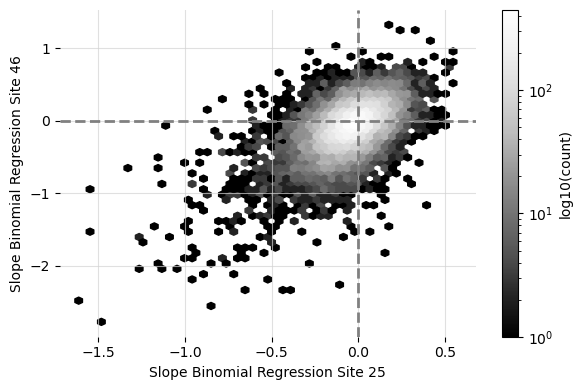

In [59]:

# List of pairs of sites to process
#site_pairs = [(49, 1), (49, 25), (46, 25), (46, 49), (25,49), (46,1)]
site_pairs = [(46, 25)]
# Loop through each pair of sites
for site1, site2 in site_pairs:
    
    site5 = pd.read_csv(f'binom_reg/wza_site_{site1}_pr.csv')
    
    site25 = pd.read_csv(f'binom_reg/wza_site_{site2}_pr.csv')
    
    #site5['slope'] = np.exp(site5['slope'])
    #site25['slope'] = np.exp(site25['slope'])
    
    site25 = site25[['block', 'Z_pVal', 'slope', 'snp_origin_bio1']]
    
    site25.columns = ['block', 'Z_pVal_site25', 'slope_site25', 'snp_origin_bio1']
    
    site5 = site5[['block', 'Z_pVal', 'slope', 'snp_origin_bio1']]
    
    site5.columns = ['block', 'Z_pVal_site5', 'slope_site5', 'snp_origin_bio1']
    
    merged = site5.merge(site25)
    
    
    
    fig, ax = plt.subplots(figsize=(6, 4))
    # Create a hexbin plot with a color bar
    hb = ax.hexbin(
        data=merged, x='slope_site5', y='slope_site25', 
        gridsize=50,  # Size of the hexagons
        cmap='Greys_r',  # Color map for the hexbins
        bins='log',  # Use logarithmic counts for coloring
        mincnt=1  # Minimum count number to display a hexagon
    )
    
    # Add horizontal and vertical lines at zero
    ax.axhline(0, color='grey', linewidth=2, zorder=5, linestyle = '--')  # Horizontal line at y=0
    ax.axvline(0, color='grey', linewidth=2, zorder=5, linestyle = '--')  # Vertical line at x=0
    
    
    # Create a color bar for the hexbin plot
    cb = fig.colorbar(hb, ax=ax)
    cb.set_label('log10(count)')
    
    # Filter the data where 'sign' is True
    
    dark_grey = '#4D4D4D'  # Define dark grey color
    plt.grid(True, color='lightgrey', alpha=0.7, zorder=0)
    
    # Apply to spines
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Set labels and title
    plt.ylabel(f'Slope Binomial Regression Site {site1}')
    plt.xlabel(f'Slope Binomial Regression Site {site2}')
    
    
    #plt.grid(True, color='lightgrey', alpha=0.7, zorder=0)
    plt.tight_layout()
    #plt.savefig('46_26_cold_sites.pdf')
    plt.show()

In [7]:
site1 = 6

In [8]:
site2 = 45

In [9]:
# Load data for each site
site5 = pd.read_csv(f'binom_reg/wza_site_{site1}_pr.csv')
site25 = pd.read_csv(f'binom_reg/wza_site_{site2}_pr.csv')

In [10]:
site5['slope']

0        0.152660
1        0.914298
2        0.682017
3       -0.133554
4       -1.008992
           ...   
16752    0.180121
16753    0.283712
16754    0.163835
16755   -0.061443
16756    0.234720
Name: slope, Length: 16757, dtype: float64

In [11]:
# Assuming log_odds is your log odds value
odds = np.exp(site5['slope'])


In [12]:
# Convert log odds to probabilities
odds = np.exp(site5['slope'])
probabilities = odds / (odds + 1)

In [13]:
probabilities

0        0.538091
1        0.713879
2        0.664189
3        0.466661
4        0.267177
           ...   
16752    0.544909
16753    0.570456
16754    0.540867
16755    0.484644
16756    0.558412
Name: slope, Length: 16757, dtype: float64

In [56]:
import pandas as pd
from scipy.stats import pearsonr

# List of pairs of sites to process
#site_pairs = [(6, 45), (43, 4), (45, 49), (6, 46)]
site_pairs = [(49, 1), (49, 25), (46, 25), (46, 49), (25,49), (46,1)]

# Loop through each pair of sites
for site1, site2 in site_pairs:
    # Load data for each site
    site5 = pd.read_csv(f'binom_reg/wza_site_{site1}_pr.csv')
    site25 = pd.read_csv(f'binom_reg/wza_site_{site2}_pr.csv')

    site5['slope'] = np.exp(site5['slope'])
    site25['slope'] = np.exp(site25['slope'])
    
    # Select and rename columns in site25 DataFrame
    site25 = site25[['block', 'Z_pVal', 'slope', 'snp_origin_bio1']]
    site25.columns = ['block', 'Z_pVal_site25', 'slope_site25', 'snp_origin_bio1']

    # Select and rename columns in site5 DataFrame
    site5 = site5[['block', 'Z_pVal', 'slope', 'snp_origin_bio1']]
    site5.columns = ['block', 'Z_pVal_site5', 'slope_site5', 'snp_origin_bio1']

    # Merge the DataFrames on 'block'
    merged = site5.merge(site25, on='block')

    # Calculate Pearson correlation coefficient and p-value
    correlation, p_value = pearsonr(merged['slope_site5'], merged['slope_site25'])

    # Print results for each pair
    print(f"Pair ({site1}, {site2}): Pearson correlation coefficient = {correlation:.3f}, p-value = {p_value}, and the n is {len(merged)}")


Pair (49, 1): Pearson correlation coefficient = 0.191, p-value = 1.2541594898240248e-137, and the n is 16757
Pair (49, 25): Pearson correlation coefficient = 0.259, p-value = 3.8902892868968148e-255, and the n is 16757
Pair (46, 25): Pearson correlation coefficient = 0.498, p-value = 0.0, and the n is 16757
Pair (46, 49): Pearson correlation coefficient = 0.318, p-value = 0.0, and the n is 16757
Pair (25, 49): Pearson correlation coefficient = 0.259, p-value = 3.8902892868968148e-255, and the n is 16757
Pair (46, 1): Pearson correlation coefficient = 0.191, p-value = 1.5839154517634998e-137, and the n is 16757


In [15]:
rs = pearsonr(merged['slope_site5'], merged['slope_site25'])
rs.summary()

AttributeError: 'PearsonRResult' object has no attribute 'summary'

In [16]:
import sys
print("Float precision limit:", sys.float_info)

Float precision limit: sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


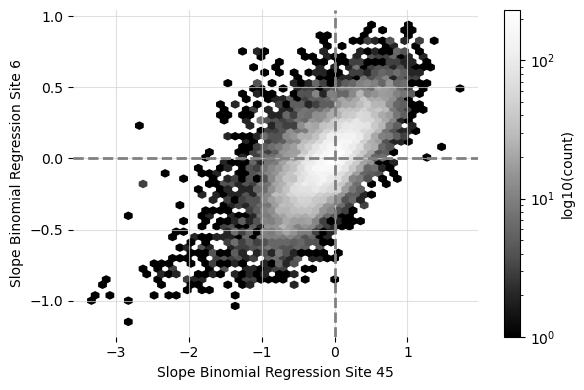

In [17]:
site1 = 6
site2 = 45

site5 = pd.read_csv(f'binom_reg/wza_site_{site1}_pr.csv')

site25 = pd.read_csv(f'binom_reg/wza_site_{site2}_pr.csv')

#site5['slope'] = np.exp(site5['slope'])
#site25['slope'] = np.exp(site25['slope'])

site25 = site25[['block', 'Z_pVal', 'slope', 'snp_origin_bio1']]

site25.columns = ['block', 'Z_pVal_site25', 'slope_site25', 'snp_origin_bio1']

site5 = site5[['block', 'Z_pVal', 'slope', 'snp_origin_bio1']]

site5.columns = ['block', 'Z_pVal_site5', 'slope_site5', 'snp_origin_bio1']

merged = site5.merge(site25)



fig, ax = plt.subplots(figsize=(6, 4))
# Create a hexbin plot with a color bar
hb = ax.hexbin(
    data=merged, x='slope_site5', y='slope_site25', 
    gridsize=50,  # Size of the hexagons
    cmap='Greys_r',  # Color map for the hexbins
    bins='log',  # Use logarithmic counts for coloring
    mincnt=1  # Minimum count number to display a hexagon
)

# Add horizontal and vertical lines at zero
ax.axhline(0, color='grey', linewidth=2, zorder=5, linestyle = '--')  # Horizontal line at y=0
ax.axvline(0, color='grey', linewidth=2, zorder=5, linestyle = '--')  # Vertical line at x=0


# Create a color bar for the hexbin plot
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(count)')

# Filter the data where 'sign' is True

dark_grey = '#4D4D4D'  # Define dark grey color
plt.grid(True, color='lightgrey', alpha=0.7, zorder=0)

# Apply to spines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Set labels and title
plt.ylabel(f'Slope Binomial Regression Site {site1}')
plt.xlabel(f'Slope Binomial Regression Site {site2}')


#plt.grid(True, color='lightgrey', alpha=0.7, zorder=0)
plt.tight_layout()
plt.show()

In [ ]:
7.39

In [39]:
log_odds = [0.6, 0.4, 0.2, 0.0, -0.2, -0.4]
log_odds = [2,1,0,-1,-2,-3]
log_odds = [1.5,1.0,0.5,0,-0.5,-1,-1.5,-2]
log_odds = [1.0,0.5,0,-0.5,-1,-1.5]
log_odds = [1.0,0.5,0,-0.5,-1]
log_odds = [-1.0,-0.5,0,0.5,1]
log_odds = [-2.0,-1,0,1]
log_odds = [-0.5,0,0.5,1]
log_odds = [-3, -2, -1 ,0,1]

In [40]:
# Convert log-odds to odds after re-importing necessary library
odds = np.exp(log_odds)
odds.tolist()

[0.6065306597126334, 1.0, 1.6487212707001282, 2.718281828459045]

In [44]:
import math

# Define the lists of log odds
log_odds_lists = [
    [0.6, 0.4, 0.2, 0.0, -0.2, -0.4],
    [2, 1, 0, -1, -2, -3],
    [1.5, 1.0, 0.5, 0, -0.5, -1, -1.5, -2],
    [1.0, 0.5, 0, -0.5, -1, -1.5],
    [1.0, 0.5, 0, -0.5, -1],
    [-1.0, -0.5, 0, 0.5, 1],
    [-2.0, -1, 0, 1],
    [-0.5, 0, 0.5, 1, 1.5],
    [-3, -2, -1, 0, 1]
]

# Convert log odds to probabilities
def log_odds_to_probability(log_odds):
    return 1 / (1 + math.exp(-log_odds))

# Apply the conversion to each list
probability_lists = [[log_odds_to_probability(x) for x in log_odds_list] for log_odds_list in log_odds_lists]

In [43]:
probability_lists

[[0.6456563062257954,
  0.598687660112452,
  0.549833997312478,
  0.5,
  0.45016600268752216,
  0.401312339887548],
 [0.8807970779778823,
  0.7310585786300049,
  0.5,
  0.2689414213699951,
  0.11920292202211755,
  0.04742587317756678],
 [0.8175744761936437,
  0.7310585786300049,
  0.6224593312018546,
  0.5,
  0.3775406687981454,
  0.2689414213699951,
  0.18242552380635635,
  0.11920292202211755],
 [0.7310585786300049,
  0.6224593312018546,
  0.5,
  0.3775406687981454,
  0.2689414213699951,
  0.18242552380635635],
 [0.7310585786300049,
  0.6224593312018546,
  0.5,
  0.3775406687981454,
  0.2689414213699951],
 [0.2689414213699951,
  0.3775406687981454,
  0.5,
  0.6224593312018546,
  0.7310585786300049],
 [0.11920292202211755, 0.2689414213699951, 0.5, 0.7310585786300049],
 [0.3775406687981454, 0.5, 0.6224593312018546, 0.7310585786300049],
 [0.04742587317756678,
  0.11920292202211755,
  0.2689414213699951,
  0.5,
  0.7310585786300049]]

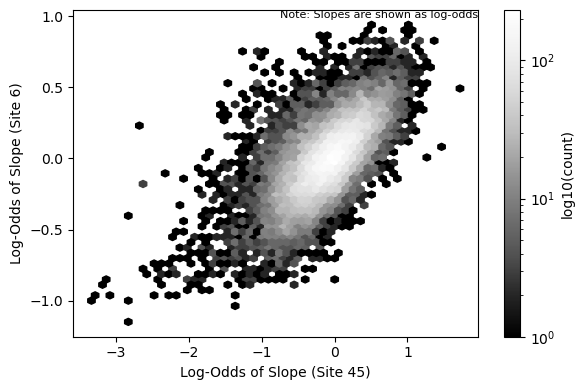

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

site1 = 6
site2 = 45

# Assuming you have already loaded your dataframes
site5 = pd.read_csv(f'binom_reg/wza_site_{site1}_pr.csv')
site25 = pd.read_csv(f'binom_reg/wza_site_{site2}_pr.csv')

# Keep original slopes for plotting
site5['odds_ratio'] = np.exp(site5['slope'])  # Store odds ratio in a new column
site25['odds_ratio'] = np.exp(site25['slope'])  # Store odds ratio in a new column

# Use original slopes for plotting
site25 = site25[['block', 'Z_pVal', 'slope', 'snp_origin_bio1']]
site25.columns = ['block', 'Z_pVal_site25', 'slope_site25', 'snp_origin_bio1']

site5 = site5[['block', 'Z_pVal', 'slope', 'snp_origin_bio1']]
site5.columns = ['block', 'Z_pVal_site5', 'slope_site5', 'snp_origin_bio1']

merged = site5.merge(site25, on=['block', 'snp_origin_bio1'])

fig, ax = plt.subplots(figsize=(6, 4))
hb = ax.hexbin(
    data=merged, x='slope_site5', y='slope_site25',
    gridsize=50, cmap='Greys_r', bins='log', mincnt=1
)

cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(count)')

# Add explanatory annotations or text to clarify that slopes are log-odds
ax.text(1, 1, 'Note: Slopes are shown as log-odds', fontsize=8, ha='right', va='top', transform=ax.transAxes)

plt.ylabel(f'Log-Odds of Slope (Site {site1})')
plt.xlabel(f'Log-Odds of Slope (Site {site2})')

plt.tight_layout()
plt.show()


In [ ]:
#plt.savefig(f'antag_pleio_site{site1}_site_{site2}_final.pdf')

In [ ]:
#plt.savefig('synergistic_pleio_site4_site_43.pdf')


In [75]:
site1_data

NameError: name 'site1_data' is not defined

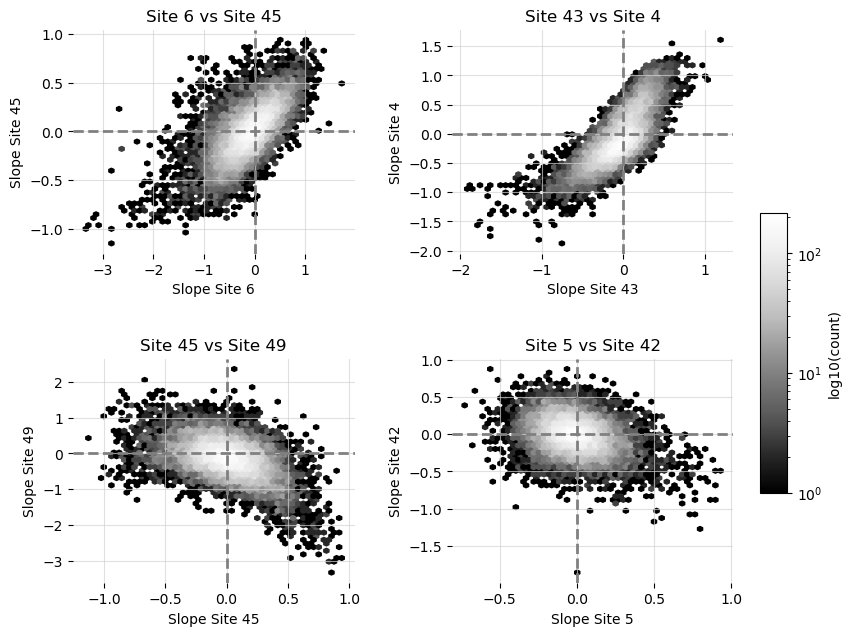

In [89]:
import matplotlib.pyplot as plt
import pandas as pd

# Site pairs for comparison
site_pairs = [(45, 49), (43, 4), (45, 49), (5, 42)]

# Prepare the figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(9, 7))  # Sharing axes
axes = axes.flatten()  # Flatten to index them easily

# Function to load and prepare data
def prepare_data(site_number, z_val_name, slope_name):
    df = pd.read_csv(f'binom_reg/wza_site_{site_number}_pr.csv')
    df = df[['block', 'Z_pVal', 'slope', 'snp_origin_bio1']]
    df.columns = ['block', z_val_name, slope_name, 'snp_origin_bio1']
    return df

# Store hexbin handles for color bar reference
hexbin_handles = []

# Plot each pair
for idx, (site1, site2) in enumerate(site_pairs):
    # Prepare data for both sites
    site1_data = prepare_data(site1, f'Z_pVal_site{site1}', f'slope_site{site1}')
    site2_data = prepare_data(site2, f'Z_pVal_site{site2}', f'slope_site{site2}')

    # Merge data
    merged = site1_data.merge(site2_data, on='block')

    # Create a hexbin plot
    ax = axes[idx]
    hb = ax.hexbin(
        data=merged, x=f'slope_site{site1}', y=f'slope_site{site2}', 
        gridsize=50, cmap='Greys_r', bins='log', mincnt=1
    )
    hexbin_handles.append(hb)  # Collect handles for colorbar
    ax.axhline(0, color='grey', linewidth=2, zorder=5, linestyle='--')
    ax.axvline(0, color='grey', linewidth=2, zorder=5, linestyle='--')
    ax.set_xlabel(f'Slope Site {site1}')
    ax.set_ylabel(f'Slope Site {site2}')
    ax.set_title(f'Site {site1} vs Site {site2}')

    # Set grid and remove spines
    ax.grid(True, color='lightgrey', alpha=0.7, zorder=0)
    for spine in ax.spines.values():
        spine.set_visible(False)

# Adjust layout before adding color bar to account for space
fig.tight_layout(pad=3.0)  # Adjust padding as necessary
plt.subplots_adjust(right=0.85)  # Leave space on the right side of the subplots for the color bar

# Add an axes at the correct position for the color bar
cbar_ax = fig.add_axes([0.88, 0.25, 0.03, 0.4])  # Adjust this to fit the figure layout

# Add the color bar using the last hexbin handle
fig.colorbar(hexbin_handles[-1], cax=cbar_ax, label='log10(count)')


#plt.savefig('synergistic_antag_pleio_site_comparisons.pdf')  # Save the figure
plt.show()


In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import os

def prepare_site_data(filename):
    """Read and preprocess data for a given file."""
    df = pd.read_csv(f'binom_reg/{filename}')
    site_number = filename.split('_')[2]  # Extract the site number from the filename
    df = df[['block', 'Z_pVal', 'slope', 'snp_origin_bio1']]
    df.columns = ['block', f'Z_pVal_site{site_number}', f'slope_site{site_number}', 'snp_origin_bio1']
    return df, site_number

def create_comparison_figures(site_files):
    for primary_file in site_files:
        primary_data, primary_site = prepare_site_data(primary_file)
        fig, axs = plt.subplots(5, 6, figsize=(30, 25))  # Adjust subplot grid as necessary
        axs = axs.flatten()  # Flatten the 2D array of axes for easier indexing

        idx = 0
        for compare_file in site_files:
            if primary_file != compare_file:
                compare_data, compare_site = prepare_site_data(compare_file)
                merged = primary_data.merge(compare_data, on='block', how='inner')

                ax = axs[idx]
                hb = ax.hexbin(
                    data=merged, x=f'slope_site{primary_site}', y=f'slope_site{compare_site}',
                    gridsize=50, cmap='Greys_r', bins='log', mincnt=1
                )
                ax.axhline(0, color='grey', linewidth=2, zorder=5)
                ax.axvline(0, color='grey', linewidth=2, zorder=5)
                ax.set_xlabel(f'Site {primary_site}')
                ax.set_ylabel(f'Site {compare_site}')
                idx += 1

        # Remove unused axes
        for ax in axs[idx:]:
            ax.remove()

        fig.tight_layout()
        plt.savefig(f'Comparison_Site_{primary_site}.png')  # Save each figure to a file
        plt.close(fig)  # Close the figure to free up memory

# List of site files
site_files = [
    'wza_site_6_pr.csv', 'wza_site_32_pr.csv', 'wza_site_24_pr.csv', 'wza_site_48_pr.csv',
    'wza_site_13_pr.csv', 'wza_site_53_pr.csv', 'wza_site_45_pr.csv', 'wza_site_4_pr.csv',
    'wza_site_9_pr.csv', 'wza_site_11_pr.csv', 'wza_site_2_pr.csv', 'wza_site_57_pr.csv',
    'wza_site_43_pr.csv', 'wza_site_55_pr.csv', 'wza_site_54_pr.csv', 'wza_site_42_pr.csv',
    'wza_site_1_pr.csv', 'wza_site_49_pr.csv', 'wza_site_52_pr.csv', 'wza_site_12_pr.csv',
    'wza_site_25_pr.csv', 'wza_site_28_pr.csv', 'wza_site_46_pr.csv', 'wza_site_10_pr.csv',
    'wza_site_27_pr.csv', 'wza_site_5_pr.csv'
]

create_comparison_figures(site_files)

In [19]:
!pwd

/carnegie/nobackup/scratch/tbellagio/gea_grene-net/snp_origin
